<a href="https://colab.research.google.com/github/aadil090/Online-Retail-Customer-Segmentation/blob/master/Online_Retail_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    -  Online Retail Customer Segmentation**

Project Type - Unsupervised

Contribution - Individual

# **Project Summary -**

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### <b>DataSet Information: </b>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

####<b>Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Checking for null values
df.isna().any()

In [ ]:
# Calculating null  Sum
df.isna().sum()

In [ ]:
# Missing Values percentage contribution in Dataframe

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

In [ ]:
 #plot of NaN values in dataset
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

####<b>There is some null value present in our dataset like in CustomerID and Description

In [ ]:
#Dropping Null VAl Rows
df.dropna(inplace=True)

In [ ]:
df.info()

In [ ]:
df.shape

####<b>After removeing null value in our dataset .it reduces to (406829, 8)

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df=df[~df['InvoiceNo'].str.contains('C')]

####<b>we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.columns

# **GitHub Link -**

https://github.com/aadil090/Online-Retail-Customer-Segmentation

# **Problem Statement**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# ***Let's Begin !***

##**Exploratory data analysis**

In [ ]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638


In [ ]:
Description_df.tail()

,Description_Name,Count
4218,Missing,1
4219,historic computer difference?....se,1
4220,DUSTY PINK CHRISTMAS TREE 30CM,1
4221,WRAP BLUE RUSSIAN FOLKART,1
4222,PINK BERTIE MOBILE PHONE CHARM,1


In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

**Top product  based on maximum selling  are :**

    1.WHITE HANGING HEART T-LIGHT HOLDER,
    2.REGENCY CAKESTAND 3 TIER
    3.JUMBO BAG RED RETROSPOT
    4.PARTY BUNTING
    5.LUNCH BAG RED RETROSPOT

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom 5 Product based on the selling are:**

    1.LIGHT DECORATION BATTERY OPERATED
    2.Water damaged
    3.throw away
    4.re dotcom quick fix.
    5.BIRTHDAY BANNER TAPE

In [ ]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2313
1,22423,2203
2,85099B,2159
3,47566,1727
4,20725,1639


In [ ]:
StockCode_df.tail()

<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

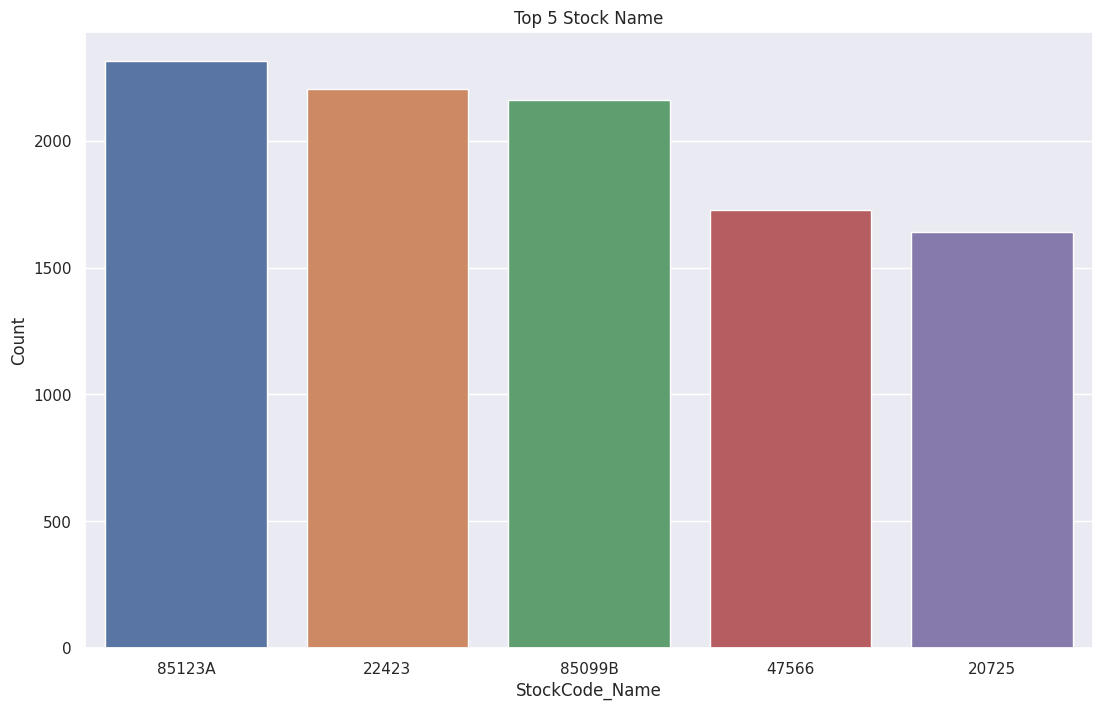

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

**Top 5 Stock name based on selling are :**

    1.85123A
    2.22423
    3.85099B
    4.47566
    5.20725


<Axes: title={'center': 'Bottom 5 Stock Name'}, xlabel='StockCode_Name', ylabel='Count'>

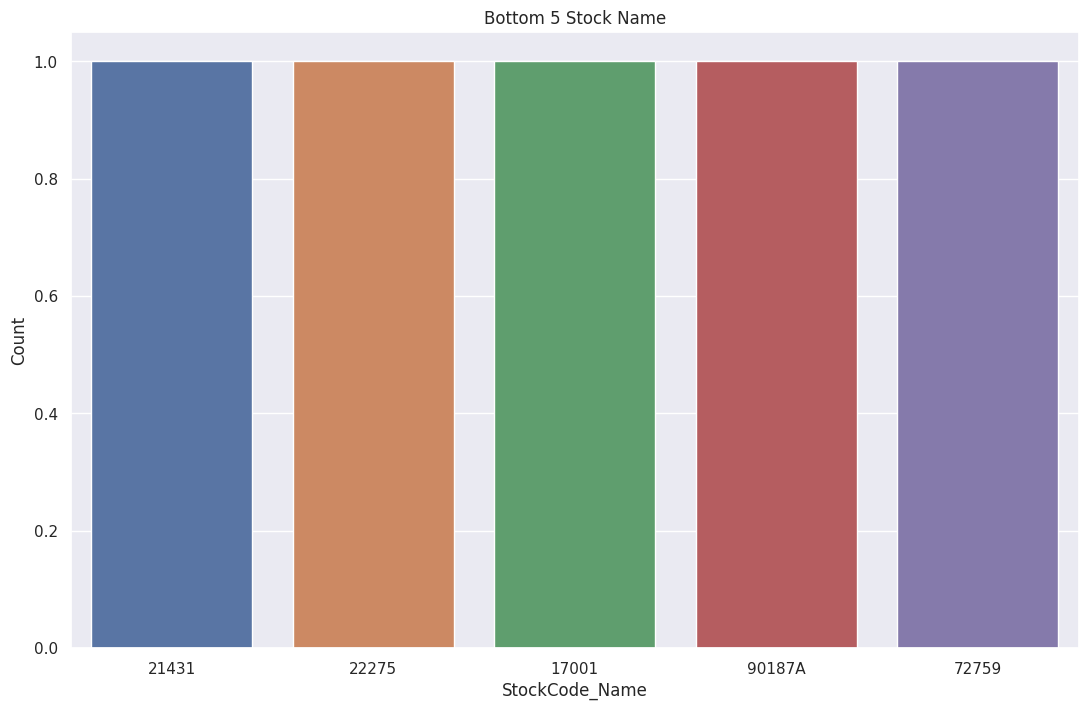

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [ ]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [ ]:
country_df.tail()

,Country_Name,Count
33,Lithuania,35
34,Brazil,32
35,Czech Republic,30
36,Bahrain,19
37,Saudi Arabia,10


<Axes: title={'center': 'Top 5 Country based on the Most Numbers Customers'}, xlabel='Country_Name', ylabel='Count'>

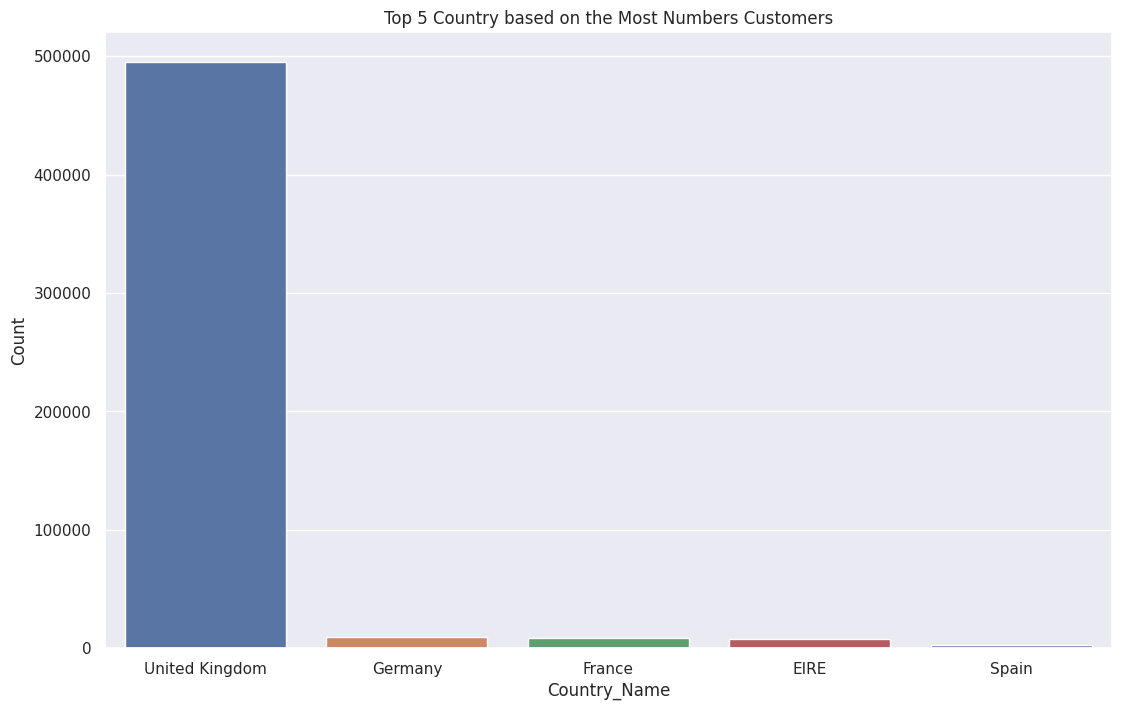

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

<Axes: title={'center': 'Top 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

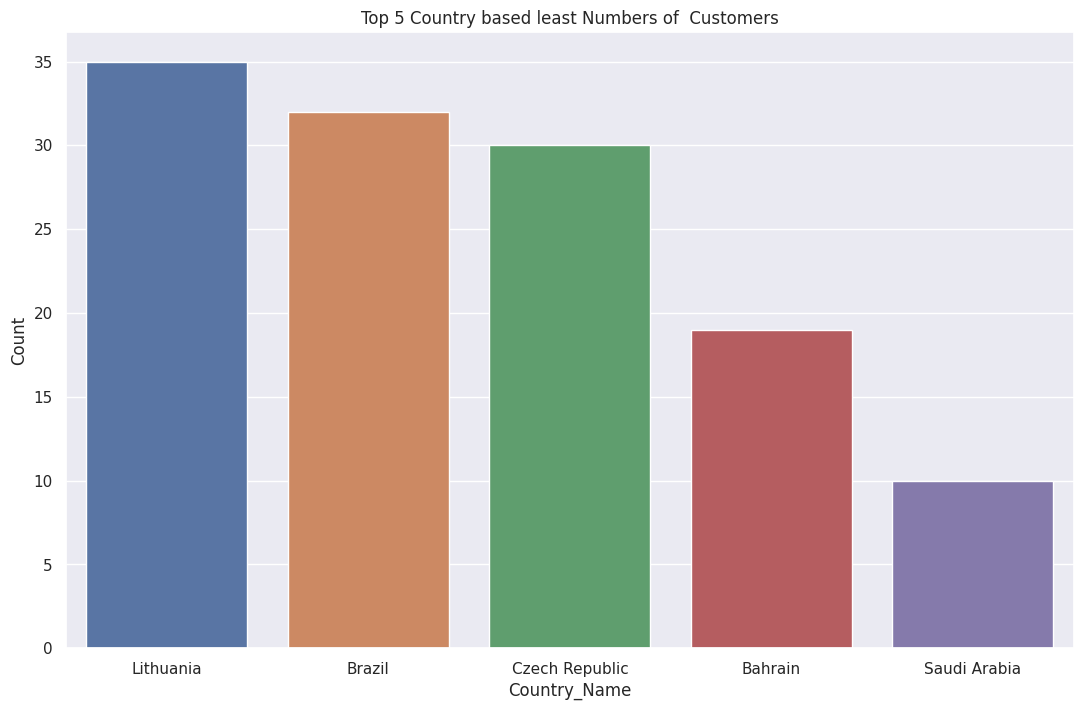

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia**

In [ ]:
df[df['Country']=='Saudi Arabia']

**1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**


**2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode**

**3. For symmetric graph mean=median=mode**

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

In [ ]:
df['Quantity'].unique()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [ ]:
df[df['UnitPrice']<0]

In [ ]:
df=df[df['UnitPrice']>0]

In [ ]:
df.head(5)

## **Feature engineering**

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

**Convert InvoiceDate columns into date time formate**

In [ ]:
df['Day']=df['InvoiceDate'].dt.day_name()

**Create a new features Day from Invoicedate**

In [ ]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
df.head()

**Create some new features from Invoicedate like hours,year,month_num,day_num**

In [ ]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

**Create a new features TotalAmount from product of Quantity and Unitprice**

In [ ]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [ ]:
df['TotalAmount'].describe()

In [ ]:
plt.figure(figsize=(13,8))
df['TotalAmount'].describe().plot()

In [ ]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

***Most of the customers have purches the items in Thursday ,Wednesday and Tuesday***

In [ ]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

***most numbers of customers have purches the gifts in the month of November ,October and December September***

***less numbers of customers have purches the gifts in the month of April ,january and February***

In [ ]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

***From this graph we can see that in Afternoon Time most of the customers have purches the item.***

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['hour'].apply(time_type)

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

***Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening***

In [ ]:
df.head(10)

##**Create the RFM model (Recency, Frequency,Monetary value)**

###Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

###Calculating RFM scores

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, **the higher the RFM score, the more valuable the customer**.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

### **Split into four segments using quantiles**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **K-Means Clustering**

##**Applying Silhouette Score Method on Recency and Monetary**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

##**Calculation of Silhouette score**

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

##**Applying Elbow Method on Recency and Monetary**

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

***we see that ,Customers are well separate when we cluster them by Recency and Monetary***

##**Applying DBSCAN  on Recency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

***we see that ,Customers are well separate when we cluster them by Recency and Monetary***

##**Applying silhouette Score  Method on Frquency and Monetary**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

##**Applying Elbow Method on Frequency and Monetary**

In [ ]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**we see that ,Customers are well separate when we cluster them by Frequency and Monetary***

##**Applying DBSCAN to Method on Frquency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [ ]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

***we see that ,Customers are well separate when we cluster them by Frequency and Monetary***

##**3D visualization of Recency ,Frequency and Monetary**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

##**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

***we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary***

##**Applying Elbow Method on Recency ,Frequency and Monetary**

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

##**Dendogram to find the optimal number of clusters**

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

***The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90***

***No. of Cluster = 2***

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

## **Applying DBSCAN to Recency ,Frequency and Monetary**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

***we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3***

# **Summary**

In [ ]:

from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

 # **Conclusion**

 K-Mean Clustering

* Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.

* Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.

* Customers with Cluster Id 2 are frequent buyers.